# Flights Dataset
## by (Nawaf Alyousef)

## Investigation Overview:

> I want to discover UniqueCarrier and his relationship with Distance ,FlightNum, Month.

## Dataset Overview:

> These dataset are information about all aspects of the flight, such as departure time, arrival time, departure airport, and arrival airport.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_flight_clean=pd.read_csv('cleaned_2000.csv')
df_flight_clean.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Airport_Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2000,1,28,5,1647.0,1647,1906.0,1859.0,HP,154,...,233.0,7.0,0.0,ATL,PHX,1587,15,11,False,False
1,2000,1,29,6,1648.0,1647,1939.0,1859.0,HP,154,...,239.0,40.0,1.0,ATL,PHX,1587,5,47,False,False
2,2000,1,30,7,NaN,1647,NaN,1859.0,HP,154,...,NaN,NaN,NaN,ATL,PHX,1587,0,0,True,False
3,2000,1,31,1,1645.0,1647,1852.0,1859.0,HP,154,...,226.0,-7.0,-2.0,ATL,PHX,1587,7,14,False,False
4,2000,1,1,6,842.0,846,1057.0,1101.0,HP,609,...,244.0,-4.0,-4.0,ATL,PHX,1587,3,8,False,False


## Visualization 1

### What are the most common type of Unique Carrier?
> We notice from the drawing the most common type of carrier is a  WN , DL.

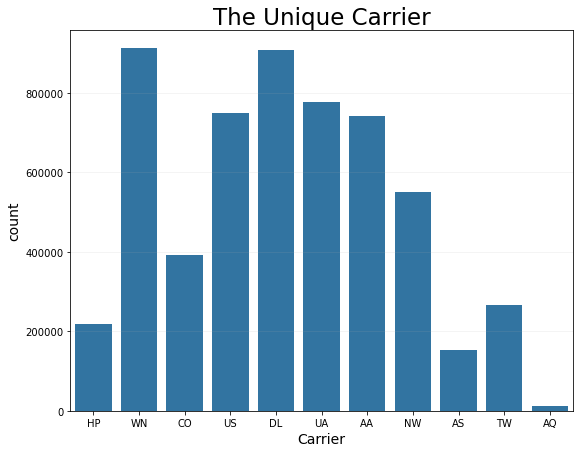

In [3]:
#The Unique Carrier.
plt.figure(figsize = [9, 7])
base_color = sb.color_palette()[0]
sb.countplot( x='UniqueCarrier',color=base_color, data=df_flight_clean), plt.grid(axis='y', alpha=0.17);
plt.ylabel('count',fontsize=14); plt.xlabel('Carrier' ,fontsize=14),plt.title("The Unique Carrier", fontsize=23);

## Visualization 2

### What is a Unique Carrier that have a Max Distance and What is a Unique Carrier that have a Min Distance?
>We note from the drawing that we want to find out which UniqueCarrier have a Max Distance and a Min Distance and the result is the UniqueCarrier have a Max Distance is CO and  UniqueCarrier have a Min Distance is AA.

Text(0.5, 1.0, 'Min Distance Vs UniqueCarrier')

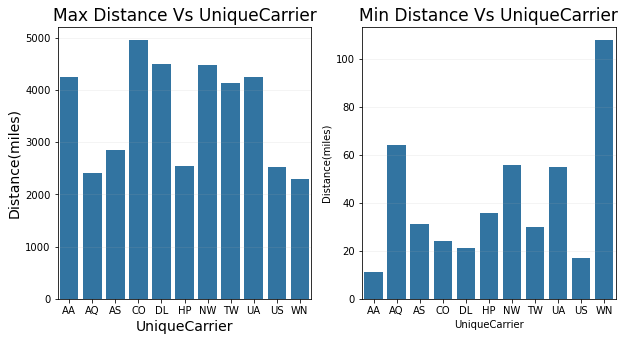

In [4]:
#Max Distance Vs UniqueCarrier && #Min Distance Vs UniqueCarrier
plt.figure(figsize = [10,5]);base_color = sb.color_palette()[0]
#Max Distance Vs UniqueCarrier
plt.subplot(1, 2, 1);Max_Dist_Carr=df_flight_clean.groupby(['UniqueCarrier'], as_index=False)['Distance'].max();sb.barplot(color = base_color,data= Max_Dist_Carr ,y ='Distance', x='UniqueCarrier'), plt.grid(axis='y', alpha=0.17);plt.ylabel('Distance(miles)',fontsize=14); plt.xlabel('UniqueCarrier' ,fontsize=14 ); plt.title('Max Distance Vs UniqueCarrier', fontsize=17)
#Min Distance Vs UniqueCarrier
plt.subplot(1, 2, 2);Min_Dist_Carr=df_flight_clean.groupby(['UniqueCarrier'], as_index=False)['Distance'].min();sb.barplot(color = base_color, data= Min_Dist_Carr ,y ='Distance', x='UniqueCarrier'), plt.grid(axis='y', alpha=0.17);plt.ylabel('Distance(miles)',fontsize=10); plt.xlabel('UniqueCarrier' ,fontsize=10 ); plt.title('Min Distance Vs UniqueCarrier', fontsize=17)

## Visualization 3

### What is the relationship between UniqueCarrier, Month, DayOfWeek, FlightNum ?
>We notice through the drawing that shows the relationship of UniqueCarrier's , Month  , Days,FlightNum  ,we note the number of flights in DL UniqueCarrier are greater than US UniqueCarrier  , and we note in both US ,DL UniqueCarrier's the tall duration of max number of flights is in mothe five from day one to day five also  in mothe 12 from day five  to day seven.

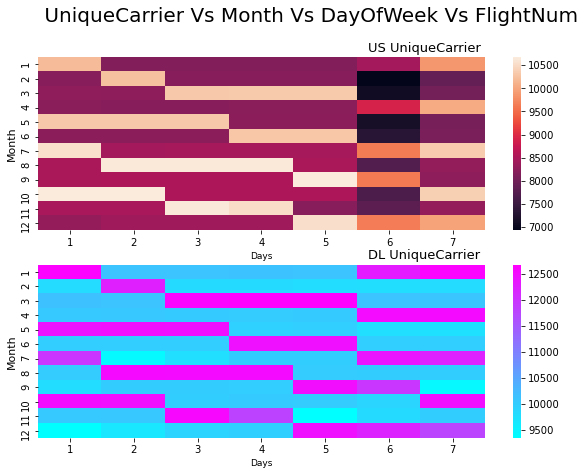

In [5]:
#UniqueCarrier Vs Month Vs DayOfWeek Vs FlightNum
plt.figure(figsize = [10,7]) 
plt.subplot(2, 1, 1)
US=df_flight_clean.loc[df_flight_clean['UniqueCarrier'].isin(['US'])];US_M_D_NFlight =US.groupby([ 'Month','DayOfWeek']).size().reset_index(name='FlightNum');US_M_D_NFlight_p= US_M_D_NFlight.pivot('Month', 'DayOfWeek', 'FlightNum');sb.heatmap(US_M_D_NFlight_p );plt.ylabel('Month',fontsize=11); plt.xlabel('Days' ,fontsize=9),plt.title('US UniqueCarrier ',loc='right', fontsize=13);
plt.subplot(2, 1, 2)
DL=df_flight_clean.loc[df_flight_clean['UniqueCarrier'].isin(['DL'])];DL_M_D_NFlight =DL.groupby([ 'Month','DayOfWeek']).size().reset_index(name='FlightNum');DL_M_D_NFlight_p= DL_M_D_NFlight.pivot('Month', 'DayOfWeek', 'FlightNum');sb.heatmap(DL_M_D_NFlight_p ,cmap = 'cool');plt.ylabel('Month',fontsize=11); plt.xlabel('Days' ,fontsize=9),plt.title('DL UniqueCarrier ',loc='right', fontsize=13);plt.suptitle(' UniqueCarrier Vs Month Vs DayOfWeek Vs FlightNum', fontsize = 20);

In [7]:
!jupyter nbconvert slide_deck_Flights.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/traitlets/traitlets.py", line 535, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/anaconda3/lib/python3.8/site-packages/jupyter_core/application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconverta